C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[*********************100%%**********************]  1 of 1 completed
C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0023
Epoch 2/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 8.2192e-05
Epoch 3/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 7.5741e-05
Epoch 4/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 6.1601e-05
Epoch 5/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 7.1470e-05
Epoch 6/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 6.4054e-05
Epoch 7/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 6.4539e-05
Epoch 8/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 5.1162e-05
Epoch 9/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 4.0327e-05
Epoch 10/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 3.7578e-05
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


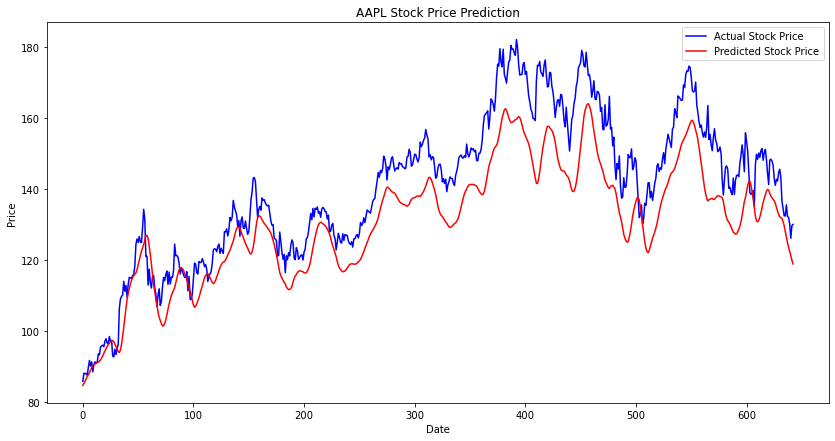

In [1]:
#Implement stock market prediction using Long Short-Term Memory (LSTM)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import yfinance as yf
from sklearn.model_selection import train_test_split

stock_symbol = 'AAPL'
data = yf.download(stock_symbol, start='2010-01-01', end='2023-01-01')

data = data[['Close']]
data = data.dropna()

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

n_steps = 60
X = []
y = []

for i in range(n_steps, len(scaled_data)):
    X.append(scaled_data[i - n_steps:i, 0])
    y.append(scaled_data[i, 0])

X = np.array(X)
y = np.array(y)

X = X.reshape(X.shape[0], X.shape[1], 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=10, batch_size=32)

predictions = model.predict(X_test)

predictions = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

plt.figure(figsize=(14,7))
plt.plot(y_test_actual, color='blue', label='Actual Stock Price')
plt.plot(predictions, color='red', label='Predicted Stock Price')
plt.title(f'{stock_symbol} Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
